<a href="https://colab.research.google.com/github/srishilesh/Udacity_DLND/blob/master/CNN/CNN_Max_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries
#### Obtain RGB image
#### Convert it to Grayscale image
#### Normalize it

[[0.972549 0.972549 0.972549 ... 0.972549 0.972549 0.972549]
 [0.972549 0.972549 0.972549 ... 0.972549 0.972549 0.972549]
 [0.972549 0.972549 0.972549 ... 0.972549 0.972549 0.972549]
 ...
 [0.972549 0.972549 0.972549 ... 0.972549 0.972549 0.972549]
 [0.972549 0.972549 0.972549 ... 0.972549 0.972549 0.972549]
 [0.972549 0.972549 0.972549 ... 0.972549 0.972549 0.972549]]


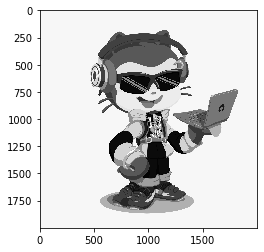

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/octocat.png'

bgr_img = cv2.imread(img_path)

gray_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)

gray_img = gray_img.astype('float32')/255
print(gray_img)
plt.imshow(gray_img,cmap='gray')
plt.show()


## Set filter values

In [30]:
filter_value = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])

filter_1 = filter_value
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = filter_2.T

filter = np.array([filter_1,filter_2,filter_3,filter_4])
print("Filters are ",filter)

Filters are  [[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]


## Visualize the filers

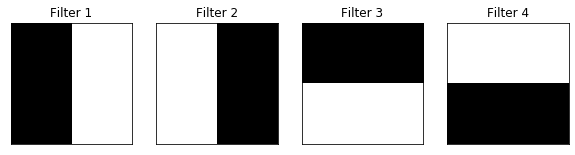

In [31]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
  ax = fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
  ax.imshow(filter[i],cmap='gray')
  ax.set_title("Filter %s"%str(i+1))

## CNN Architecture

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self,weight):
    super(Net,self).__init__()

    k_height,k_width = weight.shape[2:]   # Retrieve only height and weight of the image not the depth

    self.conv = nn.Conv2d(1,4,kernel_size=(k_height,k_width),bias=False)  # Define the convolution layer
    self.conv.weight = torch.nn.Parameter(weight) # Set the parameters of the CNN
    self.pool = nn.MaxPool2d(2,2) # Define the max pooling layer

  def forward(self,x):
    conv_x = self.conv(x)   # Pass the inputs to the convolution layer
    activated_x = F.relu(conv_x)  # Pass the outputs to the ReLu function
    pool_x = self.pool(activated_x)

    return conv_x,activated_x,pool_x

weight = torch.from_numpy(filter).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)


Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [0]:
# def viz_layer(layer,n_filter=4):
#   fig = plt.figure(figsize=(20,20))
#   for i in range(n_filter):
#     ax = fig.add_subplot(1,n_filter,i+1)
#     ax.imshow(np.squeeze(layer[0:i].data.numpy()),cmap='gray')
#     ax.set_title("Output %s"%str(i+1))

# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

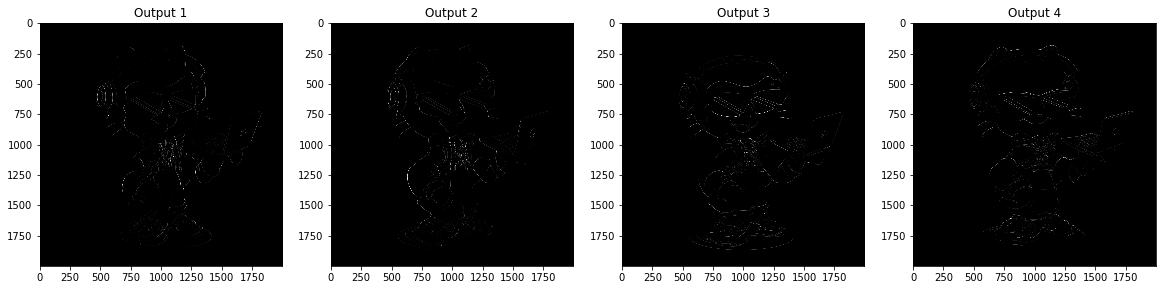

In [34]:
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

conv_layer,activated_layer,pool_layer = model(gray_img_tensor)

viz_layer(activated_layer)